In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Import necessary libraries
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import os
import matplotlib.pyplot as plt
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.models import Sequential
import numpy as np

In [3]:
# Set the path to your dataset
data_dir = '/content/drive/MyDrive/Colab Notebooks/Fiverr/Kokolet91/Organized_Dataset1'

# Define the image size and batch size
img_size = (75, 75)
batch_size = 64

# Create data generators with data augmentation for training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # 80% training, 20% validation
)

Creating the train set

In [4]:
train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'  # specify this is the training set
)

Found 7735 images belonging to 6 classes.


In [5]:
train_generator.class_indices

{'15-18': 0, '19-22': 1, '23-26': 2, '27-30': 3, '31-35': 4, '36-40': 5}

Creating the test set

In [6]:
validation_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'  # specify this is the validation set
)

Found 1930 images belonging to 6 classes.


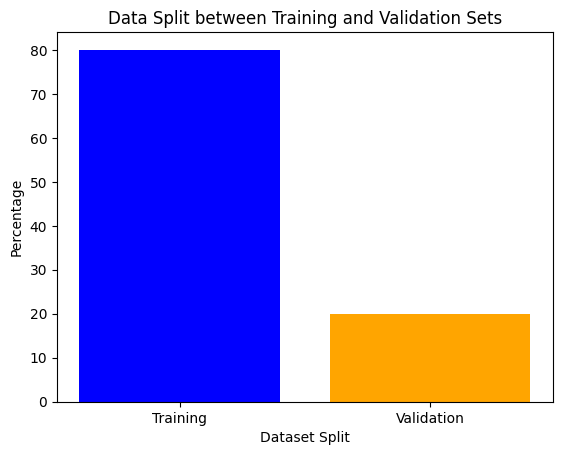

In [7]:
# Count the number of samples in each subset
train_samples = len(train_generator.labels)
val_samples = len(validation_generator.labels)

# Calculate the percentage split
train_percentage = (train_samples / (train_samples + val_samples)) * 100
val_percentage = (val_samples / (train_samples + val_samples)) * 100

# Create a bar chart
plt.bar(['Training', 'Validation'], [train_percentage, val_percentage], color=['blue', 'orange'])
plt.title('Data Split between Training and Validation Sets')
plt.xlabel('Dataset Split')
plt.ylabel('Percentage')
plt.show()

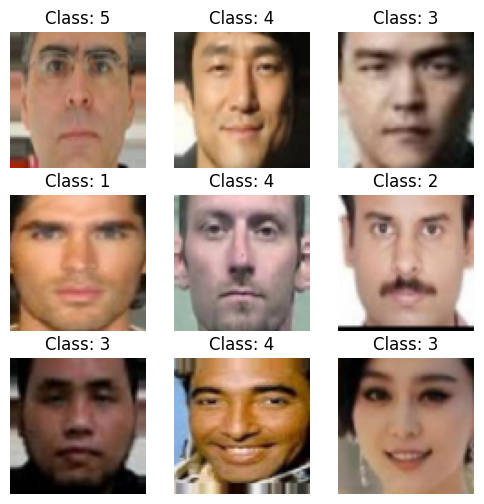

In [8]:
# Display a few sample images from the training set
sample_images, sample_labels = next(train_generator)

# Create a grid of images
plt.figure(figsize=(6, 6))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(sample_images[i])
    plt.title(f'Class: {sample_labels[i].argmax()}')
    plt.axis("off")

plt.show()

In [9]:
# Build a simple convolutional neural network (CNN) model
model = Sequential([
    BatchNormalization(),
    Conv2D(100, (3, 3), activation="relu", input_shape=(100, 100, 3)),
    MaxPooling2D(2, 2),

    Conv2D(200, (3, 3), activation="relu"),
    MaxPooling2D(2, 2),
    Dropout(0.2),

    Conv2D(300, (3, 3), activation="relu"),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(128, activation="relu"),
    Dense(256, activation="relu"),
    Dense(6, activation="softmax")
])

In [10]:
# Compile the model with Adam optimizer
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
from keras.callbacks import EarlyStopping

# Define EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [12]:
# Train the model
history = model.fit(
    train_generator,
    batch_size=64,
    epochs=50,  # You can adjust the number of epochs
    validation_data=validation_generator,
    callbacks=[early_stopping]
)

Epoch 1/50
 19/121 [===>..........................] - ETA: 16:08 - loss: 1.8091 - accuracy: 0.1997

KeyboardInterrupt: ignored